In [11]:
import kaggle
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

# Downloading the dataset

The dataset is uploaded in Kaggle as an hdf5 file. The following code creates a data folder and stores the data file there. 

Make sure you have your Kaggle API token properly configured. If you don't have any prior experience with Kaggle's API, please check the following tutorial: https://www.kaggle.com/getting-started/524433

In [4]:
kaggle.api.authenticate()
os.makedirs('data', exist_ok=True)
kaggle.api.dataset_download_files('jgbeniqu/birdpics-spanish-migratory-bird-image-dataset', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/jgbeniqu/birdpics-spanish-migratory-bird-image-dataset


# Loading and understanding the dataset

We use the h5py package to load the dataset:

In [12]:
f = h5py.File('data/bird_data.hdf5', 'r')
print("Keys: %s" % f.keys())

Keys: <KeysViewHDF5 ['test', 'train', 'val']>


As we can see, there are three main groups in the dataset, corresponding to the training ('train'), validation ('val') and testing ('test') sets.

In [13]:
f_train = f['train']
print("Keys: %s" % f_train.keys())

Keys: <KeysViewHDF5 ['X', 'Y', 'net_agreements']>


In [14]:
X_train, Y_train = f_train['X'], f_train['Y']
agree_train = f_train['net_agreements']
print("Training data shape: ", X_train.shape)
print("Training labels shape: ", Y_train.shape)
print("Training agreements shape: ", agree_train.shape)

Training data shape:  (19920, 224, 224, 3)
Training labels shape:  (19920,)
Training agreements shape:  (19920,)


In [15]:
Y_train = np.array([y.decode('utf-8') for y in Y_train])
print(Y_train[0:10])

['golondrina' 'golondrina' 'golondrina' 'avion' 'vencejo' 'avion' 'avion'
 'golondrina' 'avion' 'vencejo']


The labels are written in Spanish. Their English counterpart would be
- golondrina = swallow (Hirunda rustica)
- vencejo = swift (Apus apus)
- avion = house martin (Delichon urbicum)

Let's implement a simple function for the translation:

In [16]:
def label_in_english(label_esp):
    if label_esp == 'golondrina':
        return 'swallow'
    elif label_esp == 'vencejo':
        return 'swift'
    elif label_esp == 'avion':
        return 'house martin'
    else:
        return 'unknown'

And now let's plot a small sample of the dataset:

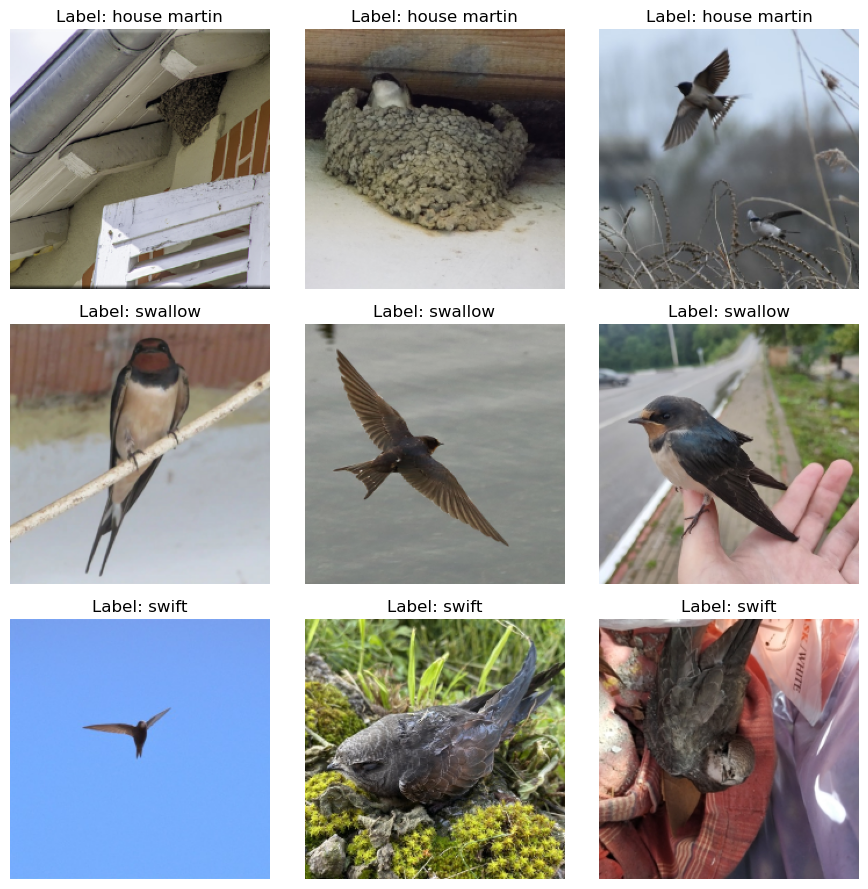

In [39]:
# Set random seed for reproducibility
seed = 2
np.random.seed(seed)

# Visualize some samples from each class
labels = np.unique(Y_train) # list of unique labels

fig,ax = plt.subplots(3, 3, figsize=(9, 9)) 
for i in range(len(labels)):
    idx = np.where(Y_train == labels[i])[0] # indices of samples with the current label
    random_sample = np.random.choice(idx, size=3, replace=False) # randomly select 3 samples
    X = X_train[np.sort(random_sample)] # get the images for the selected samples
    for j in range(3):
        ax[i, j].imshow(X[j]) # display the image
        ax[i, j].axis('off')
        ax[i, j].set_title(f"Label: {label_in_english(labels[i])}") # set title with English label
plt.tight_layout()
plt.show()

The objective when building the dataset was to isolate pictures of the birds themselves (either flying, perched, lying on the ground, etc). For that, some undesired pictures had to be removed during the cleaning process. Examples of images unsuitable for the dataset were pictures of feathers, and pictures where the birds were not recognizable. 

An automatized cleaning procedure was conducted using CLIP (OpenAI). [code to be provided in a later version]. 

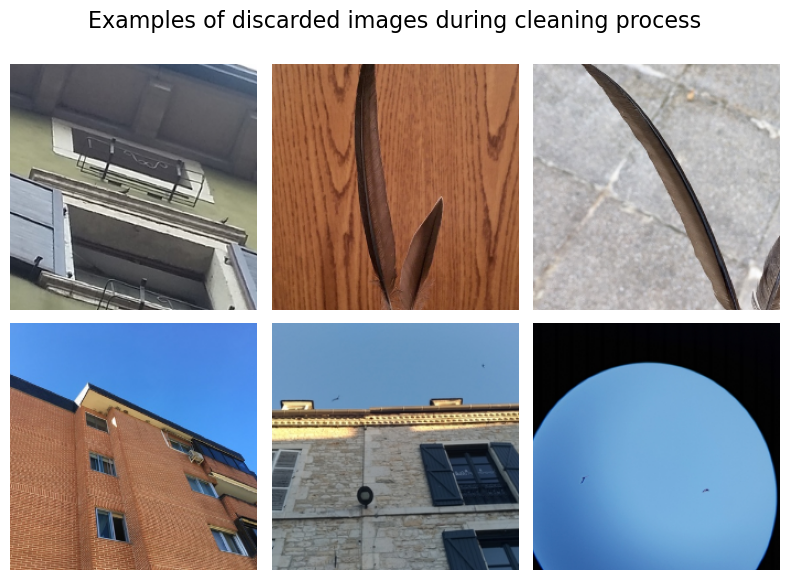

In [63]:
discarded_imgs = np.load('discarded_sample.npy')
fig, ax = plt.subplots(2, 3, figsize=(8, 6))
for i in range(len(discarded_imgs)):
    ax[i // 3, i % 3].imshow(discarded_imgs[i])
    ax[i // 3, i % 3].axis('off')
plt.suptitle('Examples of discarded images during cleaning process', fontsize=16)
plt.tight_layout()
plt.show()